# Imports

We start with imports.

Here we are importing TensorFlow and calling it tf for ease of use.

We then import a library - numpy.

This library will help us to represent our data as lists easily and quickly.

Then we import a framework - keras.

This will help us define a neural network as a set of Sequential layers.

We import the library - matplotlib.pyplot as plt for ease of use.

This will help us to plot images.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

Checking version of TensorFlow.

In [2]:
print(tf.__version__)

2.5.0


# Providing the Data

The Fashion MNIST data is available directly in the tf.keras datasets API.

We load it here.

In [3]:
mnist = tf.keras.datasets.fashion_mnist

# Creating Training and Testing set

We create the training and testing values for the graphics that contain the clothing items and their labels by calling load_data on the object - mnist.

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Printing a training image, and a training label

We set linewidth at 200 by using np.set_printoptions

To display data as an image plt.imshow is used.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

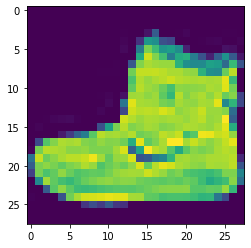

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

# Normalizing

The values in the number are between 0 and 255.

While training a neural network, for various reasons it's easier if we treat all values as between 0 and 1.

It is called 'normalizing'.

We do it here.

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Define the Neural Network

Sequential defines a SEQUENCE of layers in the neural network.

Flatten takes thae square(shape of images) and turns it into a 1 dimensional set.

Dense adds a layer of neurons. Each layer of neurons need an activation function to tell them what to do.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one. It turns [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05] into [0,0,0,0,1,0,0,0,0]

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compile the Neural Network

While compiling our Neural Network we have to specify two functions, a loss and an optimizer.

Computer makes a guess while trying to learn this relationship.

The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss.

Here, we are using 'sparse_categorical_crossentropy' for the loss and 'Adam' for the optimizer.

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Neural Network

We train the neural network using training data in model.fit. Here it learns the relationship between x and y.

It will go through the "OPTIMIZER" and "LOSS" loop for the number of epochs we specify.

In [9]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 919us/step - loss: 0.4908 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.3701 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.3327 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.3095 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 2s 843us/step - loss: 0.2930 - accuracy: 0.8920


Once it's done training -- we can see an accuracy value at the end of the final epoch.

This tells us that our neural network is about 89% accurate in classifying the training data.

# Evaluate the Model

Now, we have a model which has learned the relationship between the image and the labels.

To evaluate the model we call model.evaluate, and pass in the two test sets.

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 14s 715us/step - loss: 0.3475 - accuracy: 0.8766


[0.3474598526954651, 0.8766000270843506]